# Task 2: Mapping Child Mortality Trends Across the East African Community

<div style="text-align: center;">
    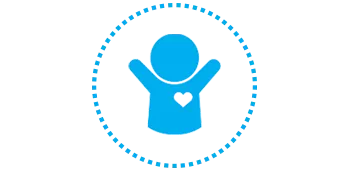
</div>

# 1. Business Understanding

## 1.1 Problem Statement

Child mortality remains a major public health concern in the East African Community (EAC), where disparities in healthcare access and socioeconomic factors contribute to varying outcomes across countries. This analysis aims to explore spatial and temporal patterns of under-five and neonatal mortality rates within the EAC region. By leveraging geospatial data and time-series visualizations, the project seeks to identify countries with the highest burden of child mortality and uncover regional trends, supporting evidence-based interventions and policymaking.

## 1.2 Objectives

1. Filter data for the eight countries belonging to the East African Community (list here: https://www.eac.int/overview-of-eac)
2. Visualize the latest estimate of each indicator at the country level using shapefiles, which can be downloaded from www.gadm.org.
3. Show the average trends in the mortality rates over time (plot the average trend line and add the points in the graphic for the country level estimates for each indicator. Expectation: two plots).
4. Based on your visualizations, identify the countries with the highest under-five mortality rates in East Africa and the highest neonatal mortality.

# 2. Importing Libraries and Warnings

In [1]:
import json
import warnings
%matplotlib inline
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

# 3. Data Understanding

  GID_0  COUNTRY                                           geometry
0   BDI  Burundi  MULTIPOLYGON (((30.0452 -4.2568, 30.0473 -4.26...
EPSG:4326


<Axes: >

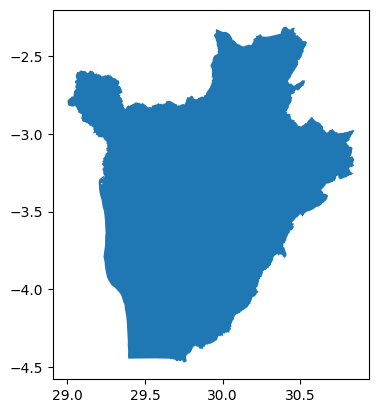

In [2]:
# loading the data
burundi = gpd.read_file("data/gadm41_BDI_0.json")

# View and inspect
print(burundi.head())
print(burundi.crs) 
burundi.plot()     

  GID_0                       COUNTRY  \
0   COD  DemocraticRepublicoftheCongo   

                                            geometry  
0  MULTIPOLYGON (((27.2491 -11.7946, 27.2326 -11....  
EPSG:4326


<Axes: >

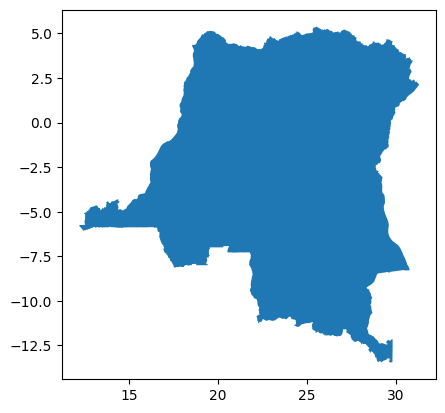

In [3]:
# loading the data
congo = gpd.read_file("data/gadm41_COD_0.json")

# View and inspect
print(congo.head())
print(congo.crs) 
congo.plot()     

  GID_0 COUNTRY                                           geometry
0   KEN   Kenya  MULTIPOLYGON (((39.3801 -4.7179, 39.3774 -4.72...
EPSG:4326


<Axes: >

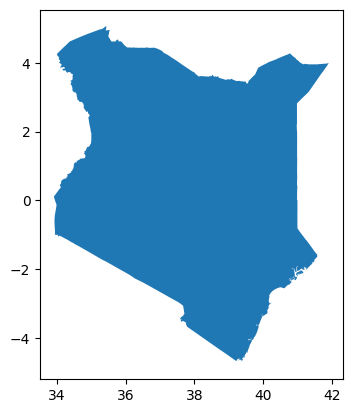

In [4]:
# loading the data
kenya = gpd.read_file("data/gadm41_KEN_0.json")

# View and inspect
print(kenya.head())
print(kenya.crs) 
kenya.plot()     

  GID_0 COUNTRY                                           geometry
0   RWA  Rwanda  MULTIPOLYGON (((29.7133 -2.8176, 29.7082 -2.81...
EPSG:4326


<Axes: >

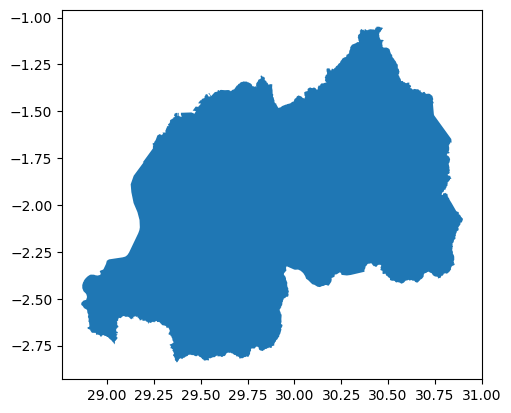

In [5]:
# loading the data
rwanda = gpd.read_file("data/gadm41_RWA_0.json")

# View and inspect
print(rwanda.head())
print(rwanda.crs) 
rwanda.plot()     

  GID_0  COUNTRY                                           geometry
0   SOM  Somalia  MULTIPOLYGON (((45.0896 1.9076, 45.091 1.9068,...
EPSG:4326


<Axes: >

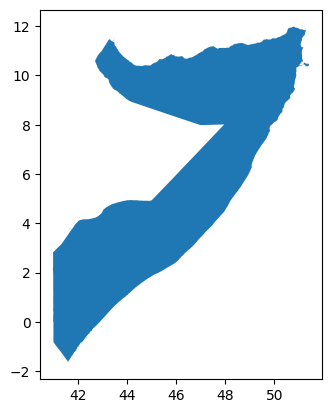

In [6]:
# loading the data
somalia = gpd.read_file("data/gadm41_SOM_0.json")

# View and inspect
print(somalia.head())
print(somalia.crs) 
somalia.plot()     

  GID_0     COUNTRY                                           geometry
0   SSD  SouthSudan  MULTIPOLYGON (((29.7957 4.3843, 29.7986 4.3952...
EPSG:4326


<Axes: >

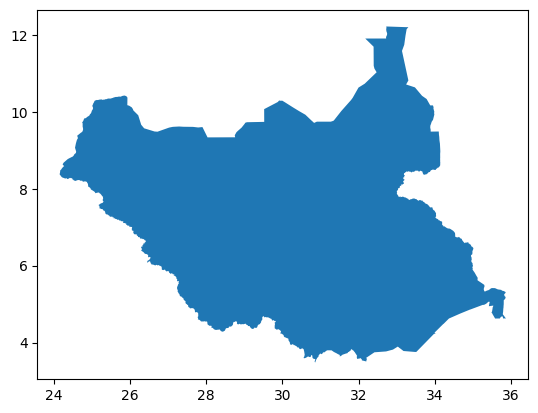

In [7]:
# loading the data
sudan = gpd.read_file("data/gadm41_SSD_0.json")

# View and inspect
print(sudan.head())
print(sudan.crs) 
sudan.plot()     

  GID_0   COUNTRY                                           geometry
0   TZA  Tanzania  MULTIPOLYGON (((39.3559 -11.0916, 39.3414 -11....
EPSG:4326


<Axes: >

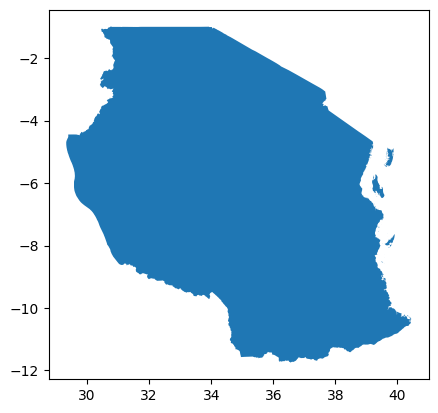

In [8]:
# loading the data
tanzania = gpd.read_file("data/gadm41_TZA_0.json")

# View and inspect
print(tanzania.head())
print(tanzania.crs) 
tanzania.plot()     

  GID_0 COUNTRY                                           geometry
0   UGA  Uganda  MULTIPOLYGON (((29.9113 -1.4769, 29.9031 -1.46...
EPSG:4326


<Axes: >

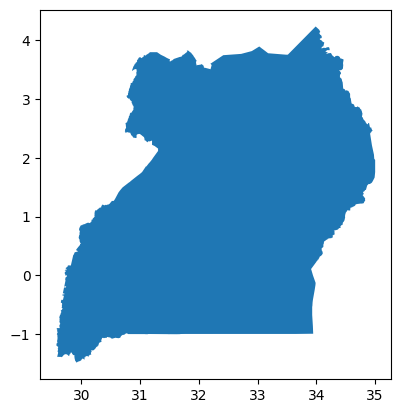

In [9]:
# loading the data
uganda = gpd.read_file("data/gadm41_UGA_0.json")

# View and inspect
print(uganda.head())
print(uganda.crs) 
uganda.plot()     

## Merging the 8 countries into a dataframe called east_africa

  GID_0                       COUNTRY  \
0   BDI                       Burundi   
1   COD  DemocraticRepublicoftheCongo   
2   KEN                         Kenya   
3   RWA                        Rwanda   
4   SOM                       Somalia   

                                            geometry  
0  MULTIPOLYGON (((30.0452 -4.2568, 30.0473 -4.26...  
1  MULTIPOLYGON (((27.2491 -11.7946, 27.2326 -11....  
2  MULTIPOLYGON (((39.3801 -4.7179, 39.3774 -4.72...  
3  MULTIPOLYGON (((29.7133 -2.8176, 29.7082 -2.81...  
4  MULTIPOLYGON (((45.0896 1.9076, 45.091 1.9068,...  


<Axes: >

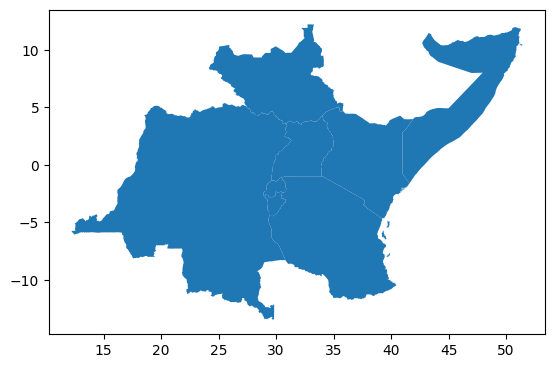

In [10]:
# Merge them
east_africa = gpd.GeoDataFrame(pd.concat([
    burundi, congo, kenya, rwanda, somalia, sudan, tanzania, uganda
], ignore_index=True))

# displaying the result
print(east_africa.head())
east_africa.plot()

In [11]:
east_africa.columns

Index(['GID_0', 'COUNTRY', 'geometry'], dtype='object')

In [12]:
under_five = pd.read_excel("data/Under-five_Mortality_Rates_2024.xlsx", skiprows=14)
under_five

,ISO.Code,Country.Name,SDG.Region,SDG.Subregion,UNICEF.Region,UNICEF.Programme.Region,Uncertainty.Bounds*,1950.5,1951.5,1952.5,...,2014.5,2015.5,2016.5,2017.5,2018.5,2019.5,2020.5,2021.5,2022.5,2023.5
0,AFG,Afghanistan,Central and Southern Asia,Southern Asia,South Asia,South Asia,Lower,NaN,NaN,NaN,...,67.462964,64.325769,61.292243,58.353418,55.407029,52.526407,49.943344,47.343507,44.818784,42.415627
1,AFG,Afghanistan,Central and Southern Asia,Southern Asia,South Asia,South Asia,Median,NaN,NaN,NaN,...,75.123625,72.438706,69.970039,67.637370,65.429899,63.324319,61.305539,59.335429,57.390636,55.507864
2,AFG,Afghanistan,Central and Southern Asia,Southern Asia,South Asia,South Asia,Upper,NaN,NaN,NaN,...,83.344067,81.105478,79.125022,77.498300,76.131817,75.214540,74.466285,73.614212,73.117748,72.699527
3,AGO,Angola,Sub-Saharan Africa,NaN,Eastern and Southern Africa,Eastern and Southern Africa,Lower,NaN,NaN,NaN,...,49.873501,45.185503,41.572154,38.472454,35.858540,33.653062,31.407141,29.855016,28.287873,26.820285
4,AGO,Angola,Sub-Saharan Africa,NaN,Eastern and Southern Africa,Eastern and Southern Africa,Median,NaN,NaN,NaN,...,92.767686,88.153253,84.056605,80.472958,77.254534,74.362895,71.596926,68.997509,66.437046,64.012571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,ZMB,Zambia,Sub-Saharan Africa,NaN,Eastern and Southern Africa,Eastern and Southern Africa,Median,NaN,NaN,237.916274,...,63.787181,61.530842,59.006779,56.068336,55.170082,54.088088,52.423322,49.213778,46.666706,44.723395
596,ZMB,Zambia,Sub-Saharan Africa,NaN,Eastern and Southern Africa,Eastern and Southern Africa,Upper,NaN,NaN,335.735757,...,69.902230,67.794807,65.543494,62.834782,62.388558,62.071180,61.303707,58.782258,57.559578,57.149928
597,ZWE,Zimbabwe,Sub-Saharan Africa,NaN,Eastern and Southern Africa,Eastern and Southern Africa,Lower,NaN,NaN,NaN,...,55.005241,52.158798,48.468248,45.309618,41.182131,38.250194,35.722722,32.142325,29.432385,27.004489
598,ZWE,Zimbabwe,Sub-Saharan Africa,NaN,Eastern and Southern Africa,Eastern and Southern Africa,Median,NaN,NaN,NaN,...,61.771426,59.763910,56.912365,54.953798,52.289701,51.062569,50.083316,47.620611,45.985854,44.212008


In [13]:
under_five.columns

Index(['ISO.Code', 'Country.Name', 'SDG.Region', 'SDG.Subregion',
       'UNICEF.Region', 'UNICEF.Programme.Region', 'Uncertainty.Bounds*',
       '1950.5', '1951.5', '1952.5', '1953.5', '1954.5', '1955.5', '1956.5',
       '1957.5', '1958.5', '1959.5', '1960.5', '1961.5', '1962.5', '1963.5',
       '1964.5', '1965.5', '1966.5', '1967.5', '1968.5', '1969.5', '1970.5',
       '1971.5', '1972.5', '1973.5', '1974.5', '1975.5', '1976.5', '1977.5',
       '1978.5', '1979.5', '1980.5', '1981.5', '1982.5', '1983.5', '1984.5',
       '1985.5', '1986.5', '1987.5', '1988.5', '1989.5', '1990.5', '1991.5',
       '1992.5', '1993.5', '1994.5', '1995.5', '1996.5', '1997.5', '1998.5',
       '1999.5', '2000.5', '2001.5', '2002.5', '2003.5', '2004.5', '2005.5',
       '2006.5', '2007.5', '2008.5', '2009.5', '2010.5', '2011.5', '2012.5',
       '2013.5', '2014.5', '2015.5', '2016.5', '2017.5', '2018.5', '2019.5',
       '2020.5', '2021.5', '2022.5', '2023.5'],
      dtype='object')

In [14]:
under_five.describe()

,1950.5,1951.5,1952.5,1953.5,1954.5,1955.5,1956.5,1957.5,1958.5,1959.5,...,2014.5,2015.5,2016.5,2017.5,2018.5,2019.5,2020.5,2021.5,2022.5,2023.5
count,195.000000,219.000000,243.000000,267.000000,291.000000,315.000000,345.000000,354.000000,369.000000,384.000000,...,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,171.807610,166.616299,163.215390,163.826192,163.252765,164.156548,167.485840,167.254259,159.367717,157.522846,...,32.542202,31.665124,31.038404,30.720820,28.991036,28.810255,27.498688,27.161237,27.940399,25.894383
std,119.362362,111.980878,105.108071,103.636011,102.911076,103.388985,107.299224,109.323068,106.489003,106.319009,...,36.705600,37.060920,38.020165,39.878091,32.974283,34.496017,31.232479,31.997294,41.089112,30.192806
min,25.533007,24.806918,23.806887,22.754782,21.850068,21.173775,20.665586,20.232727,19.865513,19.501167,...,1.287978,1.174960,1.076329,0.986155,0.908629,0.849813,0.798370,0.749194,0.707556,0.666854
25%,62.139708,64.044822,66.656934,69.088280,66.975694,67.784840,69.926169,74.791936,63.972888,65.047261,...,8.237036,8.034031,7.682754,7.333900,7.084271,6.797090,6.572779,6.401985,6.289067,6.100146
50%,141.893417,141.832989,142.843342,144.318461,146.771477,148.725633,148.637349,150.148114,142.653995,139.167629,...,18.139742,17.685532,17.339529,16.504351,16.106643,15.747022,15.171718,14.770005,14.394200,14.364096
75%,262.525545,255.526081,247.094960,246.908255,240.931746,240.510259,248.565924,245.053338,233.599707,227.442008,...,46.854217,45.215956,43.419307,42.101794,40.604177,38.596625,36.951410,36.346465,34.907185,34.794311
max,593.045358,518.429178,426.986010,426.038435,482.172784,470.394971,502.219000,546.872379,526.736145,521.498596,...,291.212696,396.082137,462.887500,513.421076,261.292503,294.977903,232.246209,230.988120,503.657324,255.741836


In [15]:
neonatal = pd.read_excel("data/Neonatal_Mortality_Rates_2024.xlsx", skiprows=14)
neonatal.head()

,ISO.Code,Country.Name,SDG.Region,SDG.Subregion,UNICEF.Region,UNICEF.Programme.Region,Uncertainty.Bounds*,1951.5,1952.5,1953.5,...,2014.5,2015.5,2016.5,2017.5,2018.5,2019.5,2020.5,2021.5,2022.5,2023.5
0,AFG,Afghanistan,Central and Southern Asia,Southern Asia,South Asia,South Asia,Lower,NaN,NaN,NaN,...,38.136786,36.737811,35.368586,33.990032,32.598642,31.062448,29.710342,28.490101,27.304480,26.059653
1,AFG,Afghanistan,Central and Southern Asia,Southern Asia,South Asia,South Asia,Median,NaN,NaN,NaN,...,42.938569,41.792524,40.755835,39.744489,38.749840,37.819286,36.915953,36.004705,35.167226,34.294072
2,AFG,Afghanistan,Central and Southern Asia,Southern Asia,South Asia,South Asia,Upper,NaN,NaN,NaN,...,48.163835,47.246697,46.552134,46.003805,45.609472,45.387575,45.208201,45.097723,45.092881,45.048595
3,AGO,Angola,Sub-Saharan Africa,NaN,Eastern and Southern Africa,Eastern and Southern Africa,Lower,NaN,NaN,NaN,...,16.631891,15.297764,14.190675,13.320140,12.546394,11.980428,11.375546,10.824049,10.350656,9.900758
4,AGO,Angola,Sub-Saharan Africa,NaN,Eastern and Southern Africa,Eastern and Southern Africa,Median,NaN,NaN,NaN,...,31.669640,30.723651,29.841947,29.076161,28.392802,27.856035,27.283052,26.646137,26.093757,25.608595


In [16]:
neonatal.columns

Index(['ISO.Code', 'Country.Name', 'SDG.Region', 'SDG.Subregion',
       'UNICEF.Region', 'UNICEF.Programme.Region', 'Uncertainty.Bounds*',
       '1951.5', '1952.5', '1953.5', '1954.5', '1955.5', '1956.5', '1957.5',
       '1958.5', '1959.5', '1960.5', '1961.5', '1962.5', '1963.5', '1964.5',
       '1965.5', '1966.5', '1967.5', '1968.5', '1969.5', '1970.5', '1971.5',
       '1972.5', '1973.5', '1974.5', '1975.5', '1976.5', '1977.5', '1978.5',
       '1979.5', '1980.5', '1981.5', '1982.5', '1983.5', '1984.5', '1985.5',
       '1986.5', '1987.5', '1988.5', '1989.5', '1990.5', '1991.5', '1992.5',
       '1993.5', '1994.5', '1995.5', '1996.5', '1997.5', '1998.5', '1999.5',
       '2000.5', '2001.5', '2002.5', '2003.5', '2004.5', '2005.5', '2006.5',
       '2007.5', '2008.5', '2009.5', '2010.5', '2011.5', '2012.5', '2013.5',
       '2014.5', '2015.5', '2016.5', '2017.5', '2018.5', '2019.5', '2020.5',
       '2021.5', '2022.5', '2023.5'],
      dtype='object')

In [17]:
neonatal.describe()

,1951.5,1952.5,1953.5,1954.5,1955.5,1956.5,1957.5,1958.5,1959.5,1960.5,...,2014.5,2015.5,2016.5,2017.5,2018.5,2019.5,2020.5,2021.5,2022.5,2023.5
count,6.000000,24.000000,42.000000,60.000000,81.000000,84.000000,93.000000,99.000000,102.000000,147.000000,...,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,35.712278,62.684533,60.643169,56.086685,52.631348,52.040503,53.641159,53.202720,53.323571,43.116561,...,14.090069,13.877720,13.678418,13.485342,13.283544,13.109515,12.921606,12.749280,12.591085,12.391820
std,10.069527,32.818183,28.601761,26.405364,26.477226,25.930293,26.128356,25.106198,25.288144,25.934981,...,12.172967,12.152615,12.157384,12.192889,12.175897,12.225444,12.267513,12.350496,12.479199,12.534818
min,23.581516,23.095267,22.517822,11.360953,11.021111,10.752450,10.535770,10.416208,10.336908,10.306733,...,0.336432,0.305822,0.275837,0.255619,0.232244,0.209380,0.194321,0.179755,0.165462,0.153697
25%,29.931383,38.075889,39.052043,38.306388,32.744061,32.457723,33.478704,34.229571,33.980608,20.713955,...,4.265432,4.139714,3.941088,3.888417,3.732566,3.616244,3.478274,3.402716,3.332640,3.299767
50%,34.508159,51.564556,52.623680,52.017574,50.021801,49.067358,50.560800,51.080297,49.797854,36.063661,...,10.285360,9.882865,9.764833,9.427988,9.224776,9.054624,8.982504,8.778588,8.357834,8.048038
75%,39.478225,82.683764,78.520896,66.356542,68.035450,67.432323,69.430589,68.314999,68.187050,61.224022,...,22.224594,21.481095,21.198930,20.563733,20.051794,19.326835,18.848331,18.664945,18.143534,17.692442
max,52.135131,140.170720,135.883785,132.378112,129.131041,126.048996,123.135407,120.304996,117.754447,114.985460,...,75.445125,77.684399,81.503584,85.600881,87.426347,91.172170,96.167128,101.579739,107.027300,113.447167


# 4. Data Cleaning

## Dropping unwanted columns

In [18]:
# Filter for median values only
under_five = under_five[
    (under_five['Uncertainty.Bounds*'] == 'Median')
][['ISO.Code', 'Country.Name', 'Uncertainty.Bounds*', '2010.5', '2011.5', '2012.5', '2013.5', '2014.5', '2015.5', '2016.5', '2017.5', '2018.5', '2019.5', '2020.5', '2021.5', '2022.5', '2023.5']]

under_five

,ISO.Code,Country.Name,Uncertainty.Bounds*,2010.5,2011.5,2012.5,2013.5,2014.5,2015.5,2016.5,2017.5,2018.5,2019.5,2020.5,2021.5,2022.5,2023.5
1,AFG,Afghanistan,Median,88.301607,84.627930,81.208564,78.022992,75.123625,72.438706,69.970039,67.637370,65.429899,63.324319,61.305539,59.335429,57.390636,55.507864
4,AGO,Angola,Median,119.819802,112.052809,104.790583,98.289767,92.767686,88.153253,84.056605,80.472958,77.254534,74.362895,71.596926,68.997509,66.437046,64.012571
7,AIA,Anguilla,Median,8.552175,8.311111,8.081792,7.860715,7.639279,7.403717,7.180259,6.964463,6.747466,6.562027,6.356538,6.142444,5.943162,5.765178
10,ALB,Albania,Median,13.280390,12.169338,11.217602,10.472204,9.925917,9.578259,9.398899,9.336675,9.342939,9.386445,9.433166,9.465055,9.445711,9.370933
13,AND,Andorra,Median,4.586564,4.360151,4.139674,3.935597,3.726861,3.541221,3.365541,3.210509,3.084017,2.966176,2.856477,2.763072,2.668502,2.577572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,WSM,Samoa,Median,19.340580,19.245420,19.105075,18.925190,18.709187,18.523231,18.325915,18.112495,17.822383,20.229295,17.030775,16.595436,16.163914,15.703041
589,YEM,Yemen,Median,54.929076,52.967475,51.412793,49.464794,48.392220,49.021021,47.715511,46.574741,46.953544,45.910189,43.162926,42.375920,40.835055,39.253540
592,ZAF,South Africa,Median,50.010255,45.047097,42.468189,40.953367,39.576615,38.233286,36.836234,35.760243,34.919770,34.482042,34.071963,34.135598,34.366132,34.650595
595,ZMB,Zambia,Median,75.677223,73.133369,70.448447,67.201336,63.787181,61.530842,59.006779,56.068336,55.170082,54.088088,52.423322,49.213778,46.666706,44.723395


In [19]:
neonatal = neonatal[
    (neonatal['Uncertainty.Bounds*'] == 'Median')
][['ISO.Code', 'Country.Name', 'Uncertainty.Bounds*', '2010.5', '2011.5', '2012.5', '2013.5', '2014.5', '2015.5', '2016.5', '2017.5', '2018.5', '2019.5', '2020.5', '2021.5', '2022.5', '2023.5']]

neonatal

,ISO.Code,Country.Name,Uncertainty.Bounds*,2010.5,2011.5,2012.5,2013.5,2014.5,2015.5,2016.5,2017.5,2018.5,2019.5,2020.5,2021.5,2022.5,2023.5
1,AFG,Afghanistan,Median,48.180051,46.799966,45.462264,44.170670,42.938569,41.792524,40.755835,39.744489,38.749840,37.819286,36.915953,36.004705,35.167226,34.294072
4,AGO,Angola,Median,36.197696,34.983319,33.830993,32.677883,31.669640,30.723651,29.841947,29.076161,28.392802,27.856035,27.283052,26.646137,26.093757,25.608595
7,AIA,Anguilla,Median,4.531289,4.391513,4.272369,4.148441,4.040090,3.906964,3.782937,3.667382,3.543729,3.434182,3.329883,3.219372,3.112104,3.010001
10,ALB,Albania,Median,6.651513,6.267336,6.057008,5.920655,5.887700,6.027977,6.337997,6.680184,6.953124,7.119928,7.171098,7.113948,6.993006,6.859498
13,AND,Andorra,Median,2.223174,2.127110,2.045782,1.959006,1.871232,1.783601,1.705517,1.631661,1.570785,1.511097,1.445712,1.396408,1.346583,1.301321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,WSM,Samoa,Median,7.795724,7.760240,7.686032,7.589839,7.489284,7.385239,7.290967,7.177239,7.069583,6.971973,6.746173,6.561514,6.380653,6.172750
589,YEM,Yemen,Median,26.809911,26.160906,25.578019,25.079170,24.639302,24.291188,23.932029,23.573375,23.256981,22.951936,22.586582,22.204458,21.807773,21.369157
592,ZAF,South Africa,Median,12.506904,12.224531,11.951285,11.782555,11.691073,11.622508,11.546242,11.490495,11.468367,11.457221,11.451941,11.489775,11.563697,11.654105
595,ZMB,Zambia,Median,25.741454,25.490438,25.270779,25.068557,24.866478,24.657212,24.444387,24.203841,23.902646,23.579832,23.184008,22.779585,22.368427,21.985061


## Renaming columns

In [20]:
east_africa = east_africa.rename(columns={
    'GID_0': 'code',
    'COUNTRY': 'country',
})

east_africa

,code,country,geometry
0,BDI,Burundi,"MULTIPOLYGON (((30.0452 -4.2568, 30.0473 -4.26..."
1,COD,DemocraticRepublicoftheCongo,"MULTIPOLYGON (((27.2491 -11.7946, 27.2326 -11...."
2,KEN,Kenya,"MULTIPOLYGON (((39.3801 -4.7179, 39.3774 -4.72..."
3,RWA,Rwanda,"MULTIPOLYGON (((29.7133 -2.8176, 29.7082 -2.81..."
4,SOM,Somalia,"MULTIPOLYGON (((45.0896 1.9076, 45.091 1.9068,..."
5,SSD,SouthSudan,"MULTIPOLYGON (((29.7957 4.3843, 29.7986 4.3952..."
6,TZA,Tanzania,"MULTIPOLYGON (((39.3559 -11.0916, 39.3414 -11...."
7,UGA,Uganda,"MULTIPOLYGON (((29.9113 -1.4769, 29.9031 -1.46..."


In [21]:
under_five = under_five.rename(columns={
    'ISO.Code': 'code',
    'Country.Name': 'country',
    'Uncertainty.Bounds*': 'estimate_type',
    '2010.5': '2010',
    '2011.5': '2011',
    '2012.5': '2012',
    '2013.5': '2013',
    '2014.5': '2014',
    '2015.5': '2015',
    '2016.5': '2016',
    '2017.5': '2017',
    '2018.5': '2018',
    '2019.5': '2019',
    '2020.5': '2020',
    '2021.5': '2021',
    '2022.5': '2022',
    '2023.5': '2023'
})

under_five

,code,country,estimate_type,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,AFG,Afghanistan,Median,88.301607,84.627930,81.208564,78.022992,75.123625,72.438706,69.970039,67.637370,65.429899,63.324319,61.305539,59.335429,57.390636,55.507864
4,AGO,Angola,Median,119.819802,112.052809,104.790583,98.289767,92.767686,88.153253,84.056605,80.472958,77.254534,74.362895,71.596926,68.997509,66.437046,64.012571
7,AIA,Anguilla,Median,8.552175,8.311111,8.081792,7.860715,7.639279,7.403717,7.180259,6.964463,6.747466,6.562027,6.356538,6.142444,5.943162,5.765178
10,ALB,Albania,Median,13.280390,12.169338,11.217602,10.472204,9.925917,9.578259,9.398899,9.336675,9.342939,9.386445,9.433166,9.465055,9.445711,9.370933
13,AND,Andorra,Median,4.586564,4.360151,4.139674,3.935597,3.726861,3.541221,3.365541,3.210509,3.084017,2.966176,2.856477,2.763072,2.668502,2.577572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,WSM,Samoa,Median,19.340580,19.245420,19.105075,18.925190,18.709187,18.523231,18.325915,18.112495,17.822383,20.229295,17.030775,16.595436,16.163914,15.703041
589,YEM,Yemen,Median,54.929076,52.967475,51.412793,49.464794,48.392220,49.021021,47.715511,46.574741,46.953544,45.910189,43.162926,42.375920,40.835055,39.253540
592,ZAF,South Africa,Median,50.010255,45.047097,42.468189,40.953367,39.576615,38.233286,36.836234,35.760243,34.919770,34.482042,34.071963,34.135598,34.366132,34.650595
595,ZMB,Zambia,Median,75.677223,73.133369,70.448447,67.201336,63.787181,61.530842,59.006779,56.068336,55.170082,54.088088,52.423322,49.213778,46.666706,44.723395


In [22]:
neonatal = neonatal.rename(columns={
    'ISO.Code': 'code',
    'Country.Name': 'country',
    'Uncertainty.Bounds*': 'estimate_type',
        '2010.5': '2010',
    '2011.5': '2011',
    '2012.5': '2012',
    '2013.5': '2013',
    '2014.5': '2014',
    '2015.5': '2015',
    '2016.5': '2016',
    '2017.5': '2017',
    '2018.5': '2018',
    '2019.5': '2019',
    '2020.5': '2020',
    '2021.5': '2021',
    '2022.5': '2022',
    '2023.5': '2023'
})

neonatal

,code,country,estimate_type,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,AFG,Afghanistan,Median,48.180051,46.799966,45.462264,44.170670,42.938569,41.792524,40.755835,39.744489,38.749840,37.819286,36.915953,36.004705,35.167226,34.294072
4,AGO,Angola,Median,36.197696,34.983319,33.830993,32.677883,31.669640,30.723651,29.841947,29.076161,28.392802,27.856035,27.283052,26.646137,26.093757,25.608595
7,AIA,Anguilla,Median,4.531289,4.391513,4.272369,4.148441,4.040090,3.906964,3.782937,3.667382,3.543729,3.434182,3.329883,3.219372,3.112104,3.010001
10,ALB,Albania,Median,6.651513,6.267336,6.057008,5.920655,5.887700,6.027977,6.337997,6.680184,6.953124,7.119928,7.171098,7.113948,6.993006,6.859498
13,AND,Andorra,Median,2.223174,2.127110,2.045782,1.959006,1.871232,1.783601,1.705517,1.631661,1.570785,1.511097,1.445712,1.396408,1.346583,1.301321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,WSM,Samoa,Median,7.795724,7.760240,7.686032,7.589839,7.489284,7.385239,7.290967,7.177239,7.069583,6.971973,6.746173,6.561514,6.380653,6.172750
589,YEM,Yemen,Median,26.809911,26.160906,25.578019,25.079170,24.639302,24.291188,23.932029,23.573375,23.256981,22.951936,22.586582,22.204458,21.807773,21.369157
592,ZAF,South Africa,Median,12.506904,12.224531,11.951285,11.782555,11.691073,11.622508,11.546242,11.490495,11.468367,11.457221,11.451941,11.489775,11.563697,11.654105
595,ZMB,Zambia,Median,25.741454,25.490438,25.270779,25.068557,24.866478,24.657212,24.444387,24.203841,23.902646,23.579832,23.184008,22.779585,22.368427,21.985061


## Duplicates

In [23]:
east_africa.duplicated().sum()

0

In [24]:
under_five.duplicated().sum()

0

In [25]:
neonatal.duplicated().sum()

0

## Missing Values

In [26]:
east_africa.isna().sum()

code        0
country     0
geometry    0
dtype: int64

In [27]:
under_five.isna().sum()

code             0
country          0
estimate_type    0
2010             0
2011             0
2012             0
2013             0
2014             0
2015             0
2016             0
2017             0
2018             0
2019             0
2020             0
2021             0
2022             0
2023             0
dtype: int64

In [28]:
neonatal.isna().sum()

code             0
country          0
estimate_type    0
2010             0
2011             0
2012             0
2013             0
2014             0
2015             0
2016             0
2017             0
2018             0
2019             0
2020             0
2021             0
2022             0
2023             0
dtype: int64

In [29]:
# List of East African countries codes
eac_codes = ['BDI', 'COD', 'KEN', 'RWA', 'SOM', 'SSD', 'TZA', 'UGA']

# Filter under_five
under_five_eac = under_five[under_five['code'].isin(eac_codes)]
under_five_eac

,code,country,estimate_type,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
37,BDI,Burundi,Median,90.778397,85.253343,80.179484,75.460165,71.295292,67.557466,64.372924,61.482401,58.992498,56.657309,54.631949,52.647761,50.836723,49.207185
109,COD,Democratic Republic of the Congo,Median,113.492696,109.640404,105.996212,102.496517,98.974789,95.610036,92.338451,89.314288,86.251449,83.456886,80.698573,78.137031,75.733351,73.189681
271,KEN,Kenya,Median,53.462294,52.195346,51.218037,49.977528,48.782106,47.407713,46.024172,45.268581,44.262883,43.253533,42.778577,41.912767,41.091561,39.902085
457,RWA,Rwanda,Median,63.274661,58.086189,54.470074,51.725604,49.613295,47.769656,46.319717,45.202538,44.333049,43.442763,42.462395,41.580798,40.822398,40.014641
484,SOM,Somalia,Median,185.912017,358.545225,184.054397,142.627482,137.771799,133.559193,129.638289,155.375164,136.007759,118.090023,114.444757,110.854645,142.867483,104.019175
490,SSD,South Sudan,Median,109.361650,104.523501,100.917271,99.224694,182.331312,236.565431,263.925660,278.187220,132.410732,98.728442,98.728442,98.728442,98.728442,98.728442
553,TZA,United Republic of Tanzania,Median,68.615788,65.002594,62.138100,59.451291,56.709049,54.783347,52.452056,50.236128,48.002032,45.996349,44.163844,42.167631,40.482164,38.857044
556,UGA,Uganda,Median,76.131913,71.043508,66.684536,62.445848,59.130534,55.843686,52.480977,49.843820,47.397694,45.307572,43.509117,41.786456,40.493282,38.807676


In [30]:
# Filter neonatal
neonatal_eac = neonatal[neonatal['code'].isin(eac_codes)]
neonatal_eac

,code,country,estimate_type,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
37,BDI,Burundi,Median,28.043707,27.090033,26.140706,25.253220,24.405093,23.665723,23.000236,22.414407,21.856069,21.399161,20.929554,20.482863,20.058144,19.603026
109,COD,Democratic Republic of the Congo,Median,32.325050,31.695289,31.079391,30.488238,29.995126,29.481786,28.947007,28.437286,27.969680,27.391588,26.910041,26.408203,25.922321,25.346972
271,KEN,Kenya,Median,23.578122,23.550831,23.572642,23.611288,23.612336,23.535014,23.364267,23.153185,22.894857,22.641903,22.358748,22.103456,21.835733,21.513320
457,RWA,Rwanda,Median,23.304436,22.385700,21.631127,20.998174,20.496810,20.102737,19.756908,19.493523,19.219638,18.971144,18.724917,18.539793,18.324804,18.126902
484,SOM,Somalia,Median,44.384815,46.694105,43.016073,41.570675,40.973079,40.254291,39.499547,39.445116,38.231089,37.264921,36.780238,36.140166,36.145027,34.904816
490,SSD,South Sudan,Median,43.249373,42.112168,41.206345,40.669667,41.858952,42.710805,43.170126,43.464314,40.995054,40.364784,40.307374,40.319864,40.334090,40.240552
553,TZA,United Republic of Tanzania,Median,24.794693,24.394048,24.048526,23.830818,23.667877,23.545046,23.420507,23.298634,23.059559,22.669451,22.209006,21.644546,21.095299,20.564352
556,UGA,Uganda,Median,25.138262,24.592697,23.997499,23.354164,22.698616,22.013868,21.357250,20.719439,20.160669,19.652358,19.163102,18.744500,18.351428,17.851216


In [31]:
# Merge under-five mortality rates into east_africa shapefile
east_africa_under_five = east_africa.merge(under_five_eac, on='code')
east_africa_under_five

,code,country_x,geometry,country_y,estimate_type,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,BDI,Burundi,"MULTIPOLYGON (((30.0452 -4.2568, 30.0473 -4.26...",Burundi,Median,90.778397,85.253343,80.179484,75.460165,71.295292,67.557466,64.372924,61.482401,58.992498,56.657309,54.631949,52.647761,50.836723,49.207185
1,COD,DemocraticRepublicoftheCongo,"MULTIPOLYGON (((27.2491 -11.7946, 27.2326 -11....",Democratic Republic of the Congo,Median,113.492696,109.640404,105.996212,102.496517,98.974789,95.610036,92.338451,89.314288,86.251449,83.456886,80.698573,78.137031,75.733351,73.189681
2,KEN,Kenya,"MULTIPOLYGON (((39.3801 -4.7179, 39.3774 -4.72...",Kenya,Median,53.462294,52.195346,51.218037,49.977528,48.782106,47.407713,46.024172,45.268581,44.262883,43.253533,42.778577,41.912767,41.091561,39.902085
3,RWA,Rwanda,"MULTIPOLYGON (((29.7133 -2.8176, 29.7082 -2.81...",Rwanda,Median,63.274661,58.086189,54.470074,51.725604,49.613295,47.769656,46.319717,45.202538,44.333049,43.442763,42.462395,41.580798,40.822398,40.014641
4,SOM,Somalia,"MULTIPOLYGON (((45.0896 1.9076, 45.091 1.9068,...",Somalia,Median,185.912017,358.545225,184.054397,142.627482,137.771799,133.559193,129.638289,155.375164,136.007759,118.090023,114.444757,110.854645,142.867483,104.019175
5,SSD,SouthSudan,"MULTIPOLYGON (((29.7957 4.3843, 29.7986 4.3952...",South Sudan,Median,109.361650,104.523501,100.917271,99.224694,182.331312,236.565431,263.925660,278.187220,132.410732,98.728442,98.728442,98.728442,98.728442,98.728442
6,TZA,Tanzania,"MULTIPOLYGON (((39.3559 -11.0916, 39.3414 -11....",United Republic of Tanzania,Median,68.615788,65.002594,62.138100,59.451291,56.709049,54.783347,52.452056,50.236128,48.002032,45.996349,44.163844,42.167631,40.482164,38.857044
7,UGA,Uganda,"MULTIPOLYGON (((29.9113 -1.4769, 29.9031 -1.46...",Uganda,Median,76.131913,71.043508,66.684536,62.445848,59.130534,55.843686,52.480977,49.843820,47.397694,45.307572,43.509117,41.786456,40.493282,38.807676


In [32]:
# drop extra columns
east_africa_under_five.drop(columns = ['country_y'], axis = 1, inplace = True)

# rename country_x to country
east_africa_under_five.rename(columns={
    'country_x': 'country'
}, inplace = True)

east_africa_under_five

,code,country,geometry,estimate_type,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,BDI,Burundi,"MULTIPOLYGON (((30.0452 -4.2568, 30.0473 -4.26...",Median,90.778397,85.253343,80.179484,75.460165,71.295292,67.557466,64.372924,61.482401,58.992498,56.657309,54.631949,52.647761,50.836723,49.207185
1,COD,DemocraticRepublicoftheCongo,"MULTIPOLYGON (((27.2491 -11.7946, 27.2326 -11....",Median,113.492696,109.640404,105.996212,102.496517,98.974789,95.610036,92.338451,89.314288,86.251449,83.456886,80.698573,78.137031,75.733351,73.189681
2,KEN,Kenya,"MULTIPOLYGON (((39.3801 -4.7179, 39.3774 -4.72...",Median,53.462294,52.195346,51.218037,49.977528,48.782106,47.407713,46.024172,45.268581,44.262883,43.253533,42.778577,41.912767,41.091561,39.902085
3,RWA,Rwanda,"MULTIPOLYGON (((29.7133 -2.8176, 29.7082 -2.81...",Median,63.274661,58.086189,54.470074,51.725604,49.613295,47.769656,46.319717,45.202538,44.333049,43.442763,42.462395,41.580798,40.822398,40.014641
4,SOM,Somalia,"MULTIPOLYGON (((45.0896 1.9076, 45.091 1.9068,...",Median,185.912017,358.545225,184.054397,142.627482,137.771799,133.559193,129.638289,155.375164,136.007759,118.090023,114.444757,110.854645,142.867483,104.019175
5,SSD,SouthSudan,"MULTIPOLYGON (((29.7957 4.3843, 29.7986 4.3952...",Median,109.361650,104.523501,100.917271,99.224694,182.331312,236.565431,263.925660,278.187220,132.410732,98.728442,98.728442,98.728442,98.728442,98.728442
6,TZA,Tanzania,"MULTIPOLYGON (((39.3559 -11.0916, 39.3414 -11....",Median,68.615788,65.002594,62.138100,59.451291,56.709049,54.783347,52.452056,50.236128,48.002032,45.996349,44.163844,42.167631,40.482164,38.857044
7,UGA,Uganda,"MULTIPOLYGON (((29.9113 -1.4769, 29.9031 -1.46...",Median,76.131913,71.043508,66.684536,62.445848,59.130534,55.843686,52.480977,49.843820,47.397694,45.307572,43.509117,41.786456,40.493282,38.807676


In [33]:
# Merge neonatal mortality rates into east_africa shapefile
east_africa_neonatal = east_africa.merge(neonatal_eac, on='code')
east_africa_neonatal

,code,country_x,geometry,country_y,estimate_type,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,BDI,Burundi,"MULTIPOLYGON (((30.0452 -4.2568, 30.0473 -4.26...",Burundi,Median,28.043707,27.090033,26.140706,25.253220,24.405093,23.665723,23.000236,22.414407,21.856069,21.399161,20.929554,20.482863,20.058144,19.603026
1,COD,DemocraticRepublicoftheCongo,"MULTIPOLYGON (((27.2491 -11.7946, 27.2326 -11....",Democratic Republic of the Congo,Median,32.325050,31.695289,31.079391,30.488238,29.995126,29.481786,28.947007,28.437286,27.969680,27.391588,26.910041,26.408203,25.922321,25.346972
2,KEN,Kenya,"MULTIPOLYGON (((39.3801 -4.7179, 39.3774 -4.72...",Kenya,Median,23.578122,23.550831,23.572642,23.611288,23.612336,23.535014,23.364267,23.153185,22.894857,22.641903,22.358748,22.103456,21.835733,21.513320
3,RWA,Rwanda,"MULTIPOLYGON (((29.7133 -2.8176, 29.7082 -2.81...",Rwanda,Median,23.304436,22.385700,21.631127,20.998174,20.496810,20.102737,19.756908,19.493523,19.219638,18.971144,18.724917,18.539793,18.324804,18.126902
4,SOM,Somalia,"MULTIPOLYGON (((45.0896 1.9076, 45.091 1.9068,...",Somalia,Median,44.384815,46.694105,43.016073,41.570675,40.973079,40.254291,39.499547,39.445116,38.231089,37.264921,36.780238,36.140166,36.145027,34.904816
5,SSD,SouthSudan,"MULTIPOLYGON (((29.7957 4.3843, 29.7986 4.3952...",South Sudan,Median,43.249373,42.112168,41.206345,40.669667,41.858952,42.710805,43.170126,43.464314,40.995054,40.364784,40.307374,40.319864,40.334090,40.240552
6,TZA,Tanzania,"MULTIPOLYGON (((39.3559 -11.0916, 39.3414 -11....",United Republic of Tanzania,Median,24.794693,24.394048,24.048526,23.830818,23.667877,23.545046,23.420507,23.298634,23.059559,22.669451,22.209006,21.644546,21.095299,20.564352
7,UGA,Uganda,"MULTIPOLYGON (((29.9113 -1.4769, 29.9031 -1.46...",Uganda,Median,25.138262,24.592697,23.997499,23.354164,22.698616,22.013868,21.357250,20.719439,20.160669,19.652358,19.163102,18.744500,18.351428,17.851216


In [34]:
# drop extra columns
east_africa_neonatal.drop(columns = ['country_y'], axis = 1, inplace = True)

# rename country_x to country
east_africa_neonatal.rename(columns={
    'country_x': 'country'
}, inplace = True)

east_africa_neonatal

,code,country,geometry,estimate_type,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,BDI,Burundi,"MULTIPOLYGON (((30.0452 -4.2568, 30.0473 -4.26...",Median,28.043707,27.090033,26.140706,25.253220,24.405093,23.665723,23.000236,22.414407,21.856069,21.399161,20.929554,20.482863,20.058144,19.603026
1,COD,DemocraticRepublicoftheCongo,"MULTIPOLYGON (((27.2491 -11.7946, 27.2326 -11....",Median,32.325050,31.695289,31.079391,30.488238,29.995126,29.481786,28.947007,28.437286,27.969680,27.391588,26.910041,26.408203,25.922321,25.346972
2,KEN,Kenya,"MULTIPOLYGON (((39.3801 -4.7179, 39.3774 -4.72...",Median,23.578122,23.550831,23.572642,23.611288,23.612336,23.535014,23.364267,23.153185,22.894857,22.641903,22.358748,22.103456,21.835733,21.513320
3,RWA,Rwanda,"MULTIPOLYGON (((29.7133 -2.8176, 29.7082 -2.81...",Median,23.304436,22.385700,21.631127,20.998174,20.496810,20.102737,19.756908,19.493523,19.219638,18.971144,18.724917,18.539793,18.324804,18.126902
4,SOM,Somalia,"MULTIPOLYGON (((45.0896 1.9076, 45.091 1.9068,...",Median,44.384815,46.694105,43.016073,41.570675,40.973079,40.254291,39.499547,39.445116,38.231089,37.264921,36.780238,36.140166,36.145027,34.904816
5,SSD,SouthSudan,"MULTIPOLYGON (((29.7957 4.3843, 29.7986 4.3952...",Median,43.249373,42.112168,41.206345,40.669667,41.858952,42.710805,43.170126,43.464314,40.995054,40.364784,40.307374,40.319864,40.334090,40.240552
6,TZA,Tanzania,"MULTIPOLYGON (((39.3559 -11.0916, 39.3414 -11....",Median,24.794693,24.394048,24.048526,23.830818,23.667877,23.545046,23.420507,23.298634,23.059559,22.669451,22.209006,21.644546,21.095299,20.564352
7,UGA,Uganda,"MULTIPOLYGON (((29.9113 -1.4769, 29.9031 -1.46...",Median,25.138262,24.592697,23.997499,23.354164,22.698616,22.013868,21.357250,20.719439,20.160669,19.652358,19.163102,18.744500,18.351428,17.851216


# 5. EDA

## Visualize the latest estimate of each indicator at the country level using shapefiles

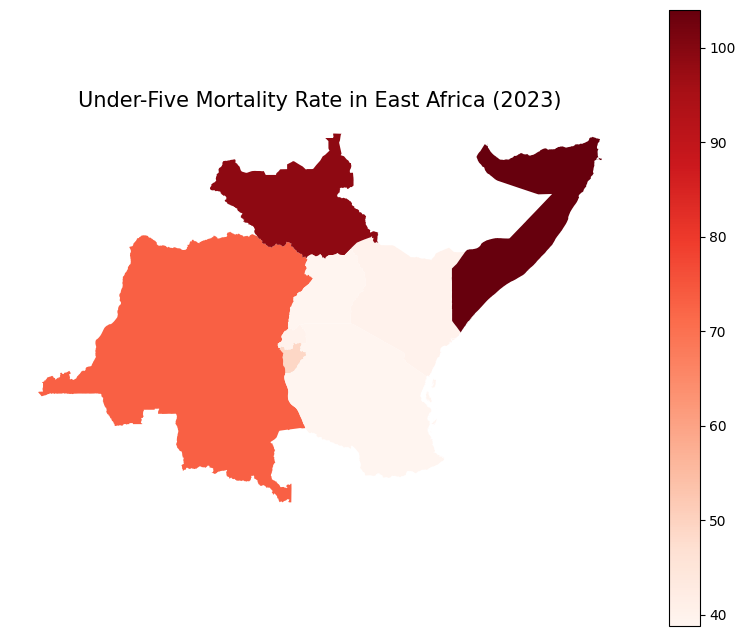

In [35]:
# Plot under-five mortality
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
east_africa_under_five.plot(column='2023', cmap='Reds', legend=True, ax=ax)
ax.set_title('Under-Five Mortality Rate in East Africa (2023)', fontsize=15)
plt.axis('off')
plt.show()

### Interpretation

South Sudan and Somalia consistently have the highest under-five mortality rates (above 100 deaths per 1000 live births for much of the period).

Kenya, Rwanda, Tanzania, and Uganda show much lower rates — below 70 deaths/1000 births, and they keep decreasing over time.

The average mortality rate across East Africa shows a steady decline over the years.

Some countries (like Somalia and South Sudan) have a lot more fluctuations, while others (like Rwanda and Kenya) show a smoother decline.

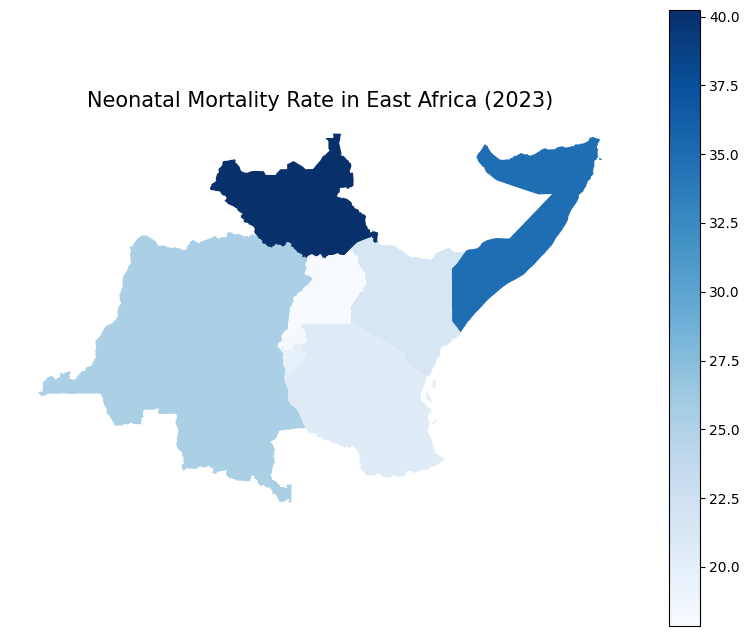

In [36]:
# Plot neonatal mortality
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
east_africa_neonatal.plot(column='2023', cmap='Blues', legend=True, ax=ax)
ax.set_title('Neonatal Mortality Rate in East Africa (2023)', fontsize=15)
plt.axis('off')
plt.show()

### Interpretation

The rates are lower than under-five mortality overall (as expected), but similar country patterns.

South Sudan and Somalia again show the highest neonatal mortality rates (around 40–45 deaths per 1000 births).

Kenya, Rwanda, and Tanzania again have much better outcomes (around 20–25 deaths per 1000).

The average neonatal mortality across the region is steadily declining, although the decline is slower compared to the under-five mortality rate.

## Show the average trends in the mortality rates over time (plot the average trend line and add the points in the graphic for the country level estimates for each indicator. Expectation: two plots). 

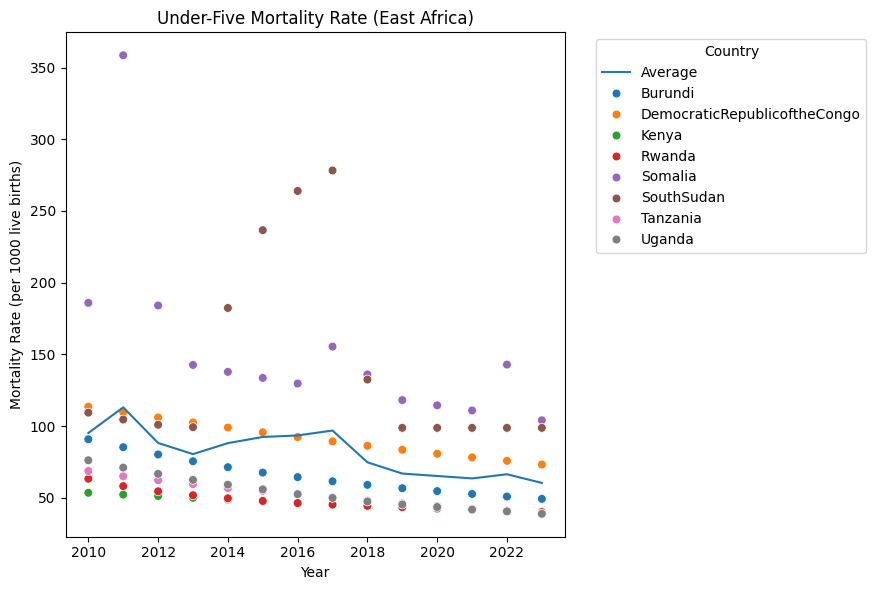

In [37]:
# 2. Melt/reshape the data
under_five_melted = east_africa_under_five.melt(id_vars=['code', 'country'], 
                                       value_vars=[str(year) for year in range(2010, 2024)],
                                       var_name='year', 
                                       value_name='under_five_rate')

# Convert year to integer
under_five_melted['year'] = under_five_melted['year'].astype(int)

# 3. Plotting
plt.figure(figsize=(14,6))

# Under-five mortality plot
plt.subplot(1, 2, 1)
sns.lineplot(
    data=under_five_melted,
    x='year',
    y='under_five_rate',
    ci=None,
    label='Average',
    estimator='mean'
)

# Remove legend=False here
sns.scatterplot(
    data=under_five_melted,
    x='year',
    y='under_five_rate',
    hue='country',   # Keep coloring by country
    s=40
)

plt.title('Under-Five Mortality Rate (East Africa)')
plt.ylabel('Mortality Rate (per 1000 live births)')
plt.xlabel('Year')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Interpretation

South Sudan and Somalia are deep red, meaning very high under-five mortality (>100 deaths/1000).

Kenya, Tanzania, and Rwanda are much lighter, indicating lower under-five mortality (closer to 40-50 deaths/1000).

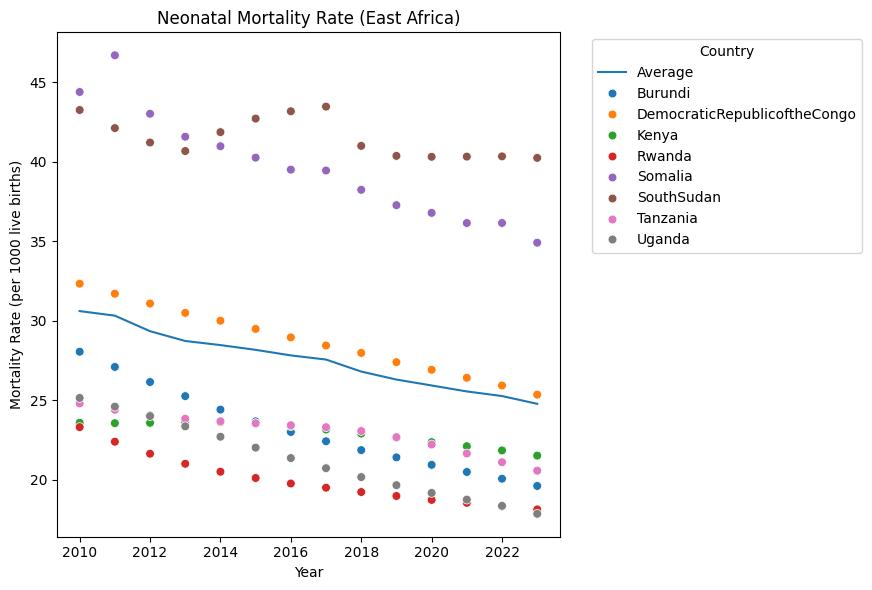

In [38]:
# 2. Melt/reshape the data
neonatal_melted = east_africa_neonatal.melt(id_vars=['code', 'country'], 
                                   value_vars=[str(year) for year in range(2010, 2024)],
                                   var_name='year', 
                                   value_name='neonatal_rate')

# Convert year to integer
neonatal_melted['year'] = neonatal_melted['year'].astype(int)

# 3. Plotting
plt.figure(figsize=(14,6))

# Neonatal mortality plot
plt.subplot(1, 2, 2)
sns.lineplot(
    data=neonatal_melted,
    x='year',
    y='neonatal_rate',
    ci=None,
    label='Average',
    estimator='mean'
)
sns.scatterplot(
    data=neonatal_melted,
    x='year',
    y='neonatal_rate',
    hue='country',
    s=40
)
plt.title('Neonatal Mortality Rate (East Africa)')
plt.ylabel('Mortality Rate (per 1000 live births)')
plt.xlabel('Year')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

### Interpretation

Again, South Sudan and Somalia are the darkest, meaning they have the highest neonatal deaths (>37 deaths/1000).

Kenya, Rwanda, and Tanzania show the lowest neonatal mortality, shaded much lighter.

Most other countries fall somewhere in between.

## Based on your visualizations, identify the countries with the highest under-five mortality rates in East Africa and the highest neonatal mortality. 

In [39]:
# Highest under-five mortality
highest_under_five = under_five_eac.sort_values(by='2023', ascending=False).head(1)

# Highest neonatal mortality
highest_neonatal = neonatal_eac.sort_values(by='2023', ascending=False).head(1)

print("Highest Under-Five Mortality:", highest_under_five[['country', '2023']])
print("Highest Neonatal Mortality:", highest_neonatal[['country', '2023']])

Highest Under-Five Mortality:      country        2023
484  Somalia  104.019175
Highest Neonatal Mortality:          country       2023
490  South Sudan  40.240552


### Interpretation

In 2023, Somalia recorded the highest under-five mortality rate in East Africa, with approximately 104 deaths per 1,000 live births, indicating a severe challenge in child survival beyond the neonatal stage. Meanwhile, South Sudan had the highest neonatal mortality rate, with about 40 deaths per 1,000 live births, reflecting major issues in newborn health and care within the first month of life. These figures suggest that both countries are facing critical health system weaknesses, likely exacerbated by ongoing conflict, instability, and limited access to quality maternal and child healthcare services.

## Write a paragraph on your findings.

Between 2010 and 2023, East Africa experienced a steady decline in both under-five and neonatal mortality rates, reflecting significant improvements in child health outcomes across the region. Countries like Rwanda, Kenya, Tanzania, and Uganda achieved the most notable progress, consistently recording lower mortality rates compared to regional averages. In contrast, South Sudan and Somalia continued to report the highest rates, with under-five mortality often exceeding 100 deaths per 1,000 live births and neonatal mortality remaining above 40 deaths per 1,000 live births. The regional averages show a positive downward trend, although the pace of improvement varied across countries. By 2023, the spatial distribution maps clearly highlighted persistent disparities, with countries experiencing political instability and conflict showing the greatest challenges in reducing child mortality, while more stable nations demonstrated remarkable success in improving early childhood survival.